In [421]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [422]:
bb_df_all = pd.read_csv("../data/bigbang.csv")

In [423]:
bb_df_all.head() # 잼있을거 같다.

,Unnamed: 0,Episode Number,Name,Date,Rating
0,0,1.1,Unaired Pilot,1 May 2006,"6.5 (2,257)"
1,1,1.2,Pilot,24 Sep. 2007,"8.2 (6,843)"
2,2,1.3,The Big Bran Hypothesis,1 Oct. 2007,"8.2 (5,524)"
3,3,1.4,The Fuzzy Boots Corollary,8 Oct. 2007,"7.6 (4,940)"
4,4,1.5,The Luminous Fish Effect,15 Oct. 2007,"8.0 (4,982)"


In [424]:
bb_df_all = pd.read_csv("../data/bigbang.csv",index_col = 0)

In [425]:
bb_df_all.head() # 이러면 unnamed:0이 사라지게 된다.

,Episode Number,Name,Date,Rating
0,1.1,Unaired Pilot,1 May 2006,"6.5 (2,257)"
1,1.2,Pilot,24 Sep. 2007,"8.2 (6,843)"
2,1.3,The Big Bran Hypothesis,1 Oct. 2007,"8.2 (5,524)"
3,1.4,The Fuzzy Boots Corollary,8 Oct. 2007,"7.6 (4,940)"
4,1.5,The Luminous Fish Effect,15 Oct. 2007,"8.0 (4,982)"


# 데이터 시각화전 전처리

In [426]:
bb_df_all.rename(columns={'Episode Number':'에피소드 번호', 'Name':'제목', 'Date':'방영날짜', 'Rating':'평점'} ,inplace = True) #

In [427]:
bb_df_all.head(20)

,에피소드 번호,제목,방영날짜,평점
0,1.10,Unaired Pilot,1 May 2006,"6.5 (2,257)"
1,1.20,Pilot,24 Sep. 2007,"8.2 (6,843)"
2,1.30,The Big Bran Hypothesis,1 Oct. 2007,"8.2 (5,524)"
3,1.40,The Fuzzy Boots Corollary,8 Oct. 2007,"7.6 (4,940)"
4,1.50,The Luminous Fish Effect,15 Oct. 2007,"8.0 (4,982)"
5,1.60,The Hamburger Postulate,22 Oct. 2007,"7.9 (4,746)"
6,1.70,The Middle Earth Paradigm,29 Oct. 2007,"8.3 (4,942)"
7,1.80,The Dumpling Paradox,5 Nov. 2007,"8.1 (4,669)"
8,1.90,The Grasshopper Experiment,12 Nov. 2007,"8.2 (4,694)"
9,1.10,The Cooper-Hofstadter Polarization,17 Mar. 2008,"8.0 (4,522)"


In [428]:
bb_df_all.tail(30)

,에피소드 번호,제목,방영날짜,평점
250,11.19,The Tenant Disassociation,5 Apr. 2018,"7.2 (2,212)"
251,11.20,The Reclusive Potential,12 Apr. 2018,"7.1 (2,216)"
252,11.21,The Comet Polarization,19 Apr. 2018,"7.4 (2,217)"
253,11.22,The Monetary Insufficiency,26 Apr. 2018,"7.2 (2,168)"
254,11.23,The Sibling Realignment,3 May 2018,"7.7 (2,332)"
255,11.24,The Bow Tie Asymmetry,10 May 2018,"8.9 (3,987)"
256,12.10,The Conjugal Configuration,24 Sep. 2018,"7.2 (2,644)"
257,12.20,The Wedding Gift Wormhole,27 Sep. 2018,"7.6 (2,528)"
258,12.30,The Procreation Calculation,4 Oct. 2018,"7.2 (2,405)"
259,12.40,The Tam Turbulence,11 Oct. 2018,"7.0 (2,323)"


In [429]:
bb_df_all.describe()

,에피소드 번호
count,280.000000
mean,6.942250
std,3.397559
min,1.100000
25%,4.147500
50%,7.125000
75%,10.102500
max,12.900000


In [430]:
bb_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   에피소드 번호  280 non-null    float64
 1   제목       280 non-null    object 
 2   방영날짜     280 non-null    object 
 3   평점       280 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.9+ KB


In [431]:
bb_df_all["에피소드 번호"]= bb_df_all["에피소드 번호"].astype("float")     #안된다 왜일까
bb_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 279
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   에피소드 번호  280 non-null    float64
 1   제목       280 non-null    object 
 2   방영날짜     280 non-null    object 
 3   평점       280 non-null    object 
dtypes: float64(1), object(3)
memory usage: 10.9+ KB


In [432]:
bb_df_all.head()

,에피소드 번호,제목,방영날짜,평점
0,1.1,Unaired Pilot,1 May 2006,"6.5 (2,257)"
1,1.2,Pilot,24 Sep. 2007,"8.2 (6,843)"
2,1.3,The Big Bran Hypothesis,1 Oct. 2007,"8.2 (5,524)"
3,1.4,The Fuzzy Boots Corollary,8 Oct. 2007,"7.6 (4,940)"
4,1.5,The Luminous Fish Effect,15 Oct. 2007,"8.0 (4,982)"


In [433]:
bb_df_all['평점'][0].split(' ')[0]

'6.5'

In [434]:
f = bb_df_all['평점'].str.split(' ')
bb_df_all['평점'] = f.str.get(0)
bb_df_all['평가 인원 수'] = f.str.get(1)  # 평점 데이터를 분리하여 새로운 columns로 만들어준다.

In [435]:
bb_df_all

,에피소드 번호,제목,방영날짜,평점,평가 인원 수
0,1.10,Unaired Pilot,1 May 2006,6.5,"(2,257)"
1,1.20,Pilot,24 Sep. 2007,8.2,"(6,843)"
2,1.30,The Big Bran Hypothesis,1 Oct. 2007,8.2,"(5,524)"
3,1.40,The Fuzzy Boots Corollary,8 Oct. 2007,7.6,"(4,940)"
4,1.50,The Luminous Fish Effect,15 Oct. 2007,8.0,"(4,982)"
...,...,...,...,...,...
275,12.20,The Decision Reverberation,25 Apr. 2019,7.1,"(2,179)"
276,12.21,The Plagiarism Schism,2 May 2019,7.2,"(2,237)"
277,12.22,The Maternal Conclusion,9 May 2019,7.9,"(2,750)"
278,12.23,The Change Constant,16 May 2019,9.0,"(4,835)"


In [436]:
bb_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   에피소드 번호  280 non-null    float64
 1   제목       280 non-null    object 
 2   방영날짜     280 non-null    object 
 3   평점       280 non-null    object 
 4   평가 인원 수  280 non-null    object 
dtypes: float64(1), object(4)
memory usage: 21.2+ KB


In [437]:
bb_df_all["평점"]= bb_df_all["평점"].astype("float")  
bb_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   에피소드 번호  280 non-null    float64
 1   제목       280 non-null    object 
 2   방영날짜     280 non-null    object 
 3   평점       280 non-null    float64
 4   평가 인원 수  280 non-null    object 
dtypes: float64(2), object(3)
memory usage: 21.2+ KB


In [438]:
#bb_df_all["평점(평가인원)"] = pd.to_numeric(bb_df_all["평점(평가인원)"], errors='coerce') #잘못된 코드
#print(bb_df_all.dtypes)

In [439]:
#bb_df_all["에피소드 번호"] = pd.to_numeric(bb_df_all["에피소드 번호"], errors='coerce') #일단 바꾸기 성공 #잘못된 코드
#print(bb_df_all.dtypes)

In [440]:
#bb_df_all = pd.read_csv("../data/bigbang.csv",sep=',') #한번 더 저장

In [441]:
bb_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 279
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   에피소드 번호  280 non-null    float64
 1   제목       280 non-null    object 
 2   방영날짜     280 non-null    object 
 3   평점       280 non-null    float64
 4   평가 인원 수  280 non-null    object 
dtypes: float64(2), object(3)
memory usage: 21.2+ KB


In [442]:
bb_df_all.describe()

,에피소드 번호,평점
count,280.000000,280.000000
mean,6.942250,7.774286
std,3.397559,0.495264
min,1.100000,6.500000
25%,4.147500,7.400000
50%,7.125000,7.800000
75%,10.102500,8.100000
max,12.900000,9.500000


In [443]:
bb_pivot= pd.pivot_table(data = bb_df_all, index="에피소드 번호", columns="평점")
bb_pivot.head()

TypeError: Could not convert Unaired Pilot to numeric

In [444]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


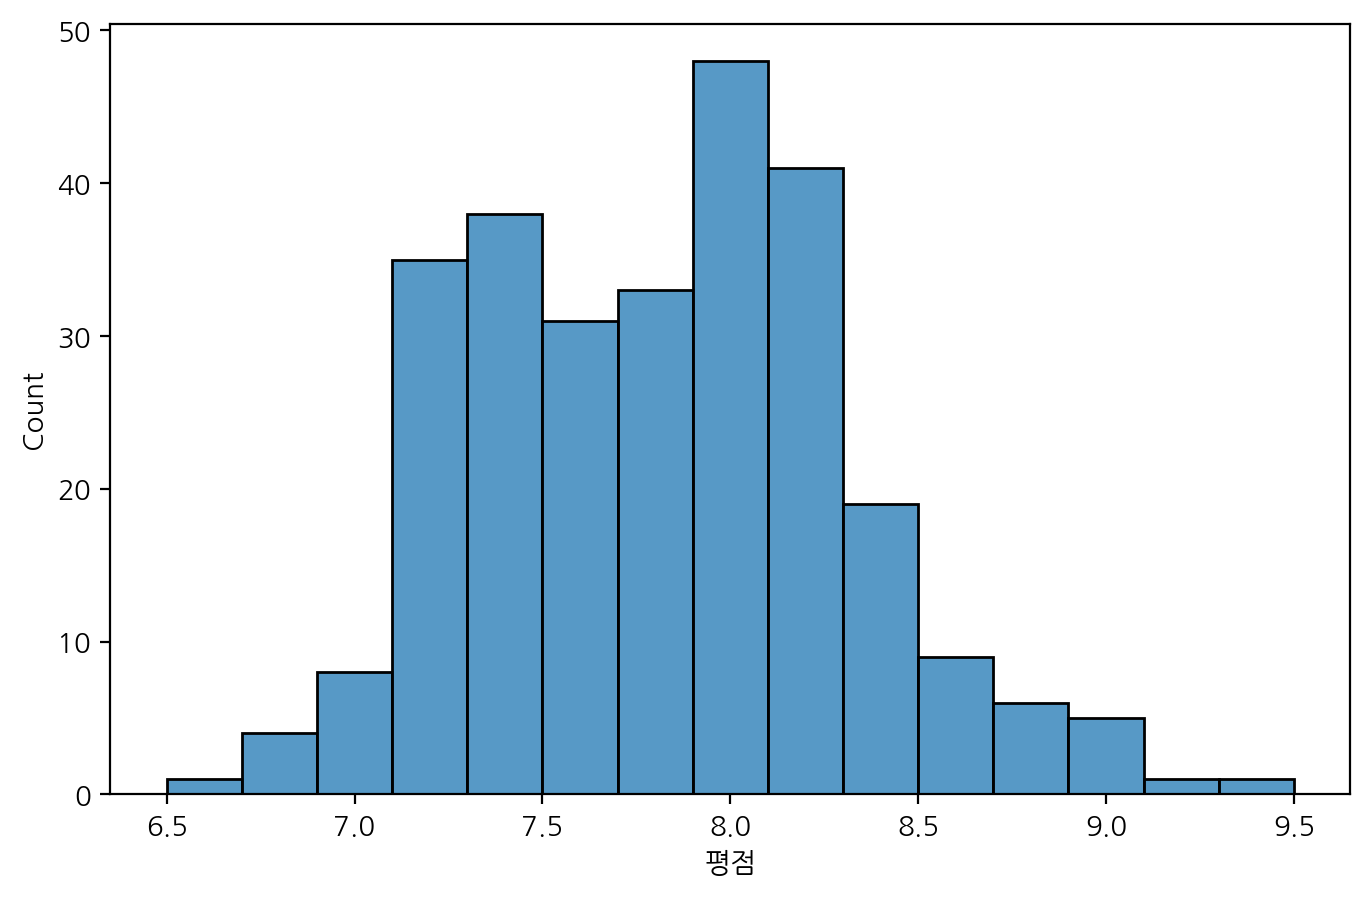

In [500]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(x=bb_df_all['평점'])
plt.show()


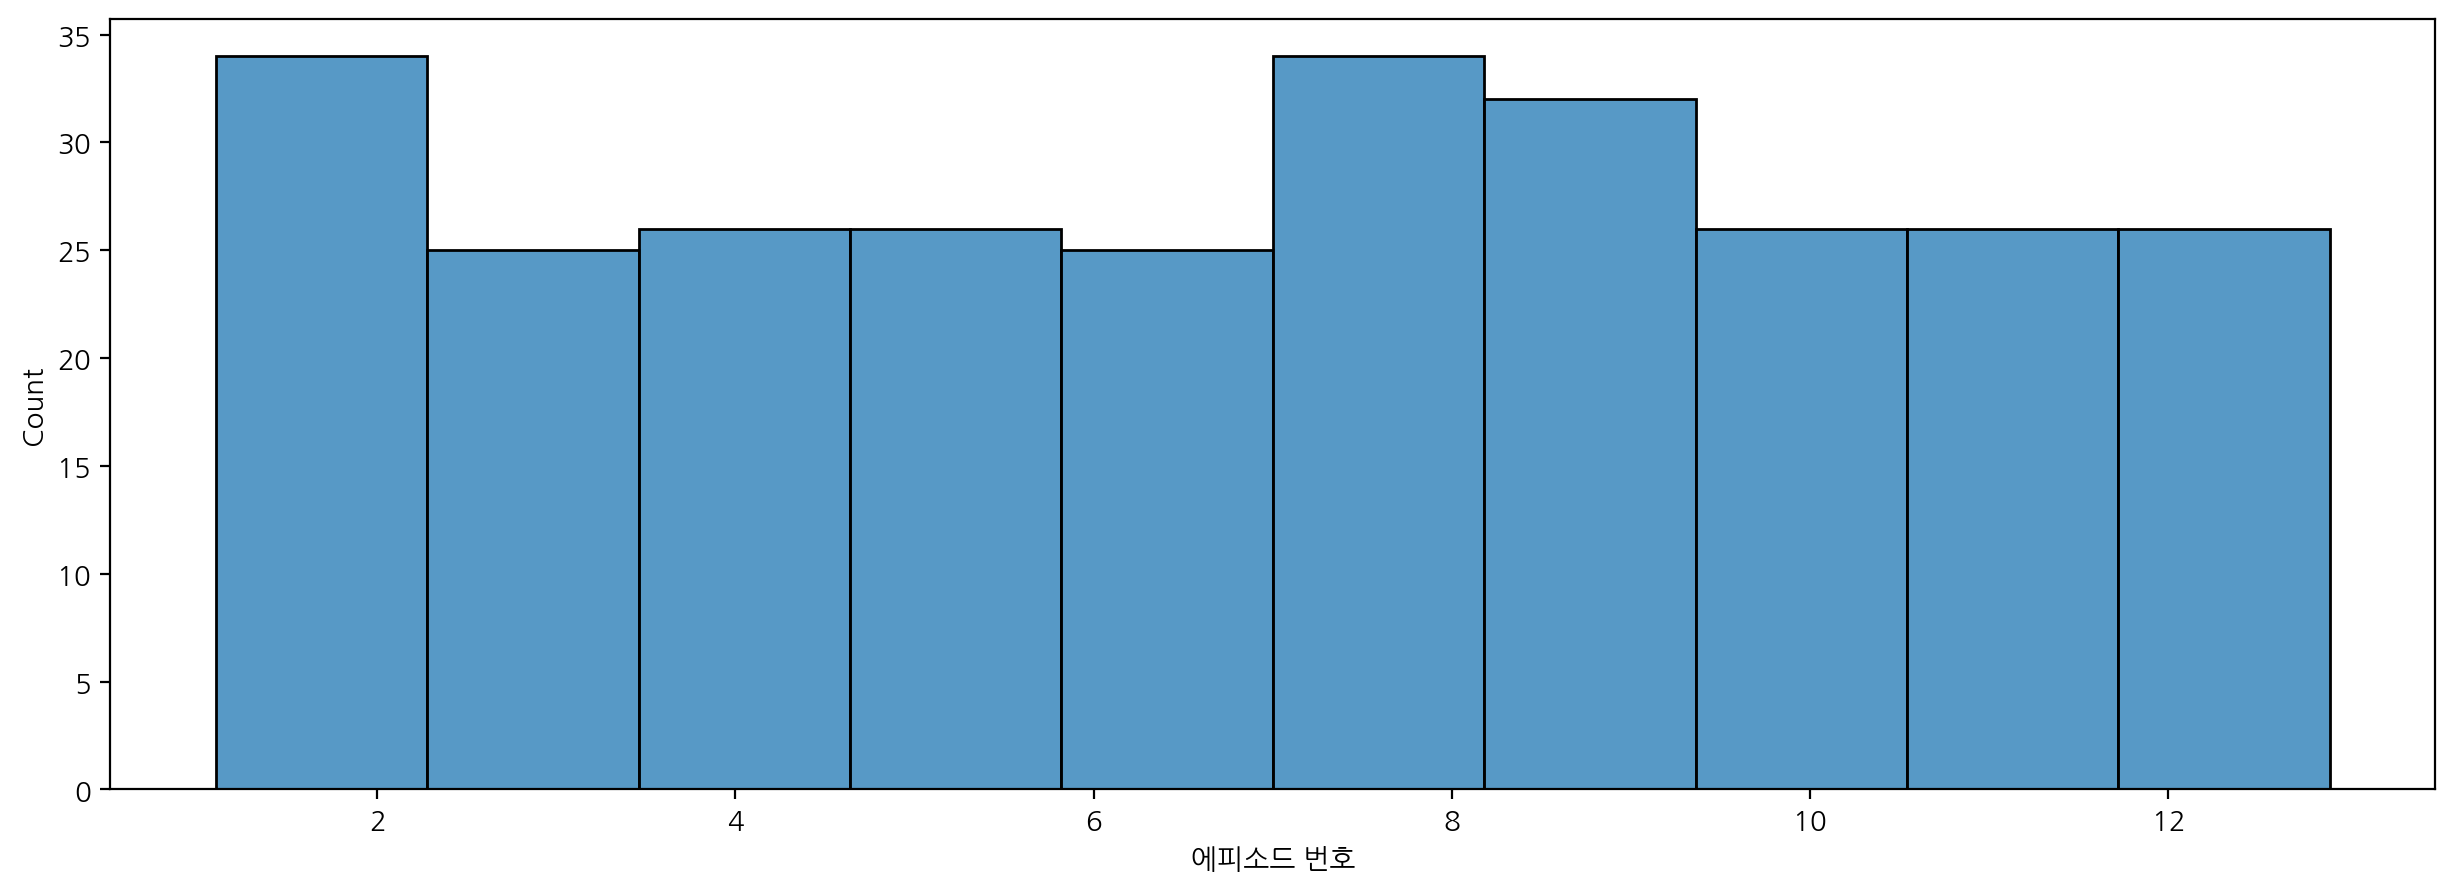

In [495]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(x=bb_df_all['에피소드 번호'])

plt.show()


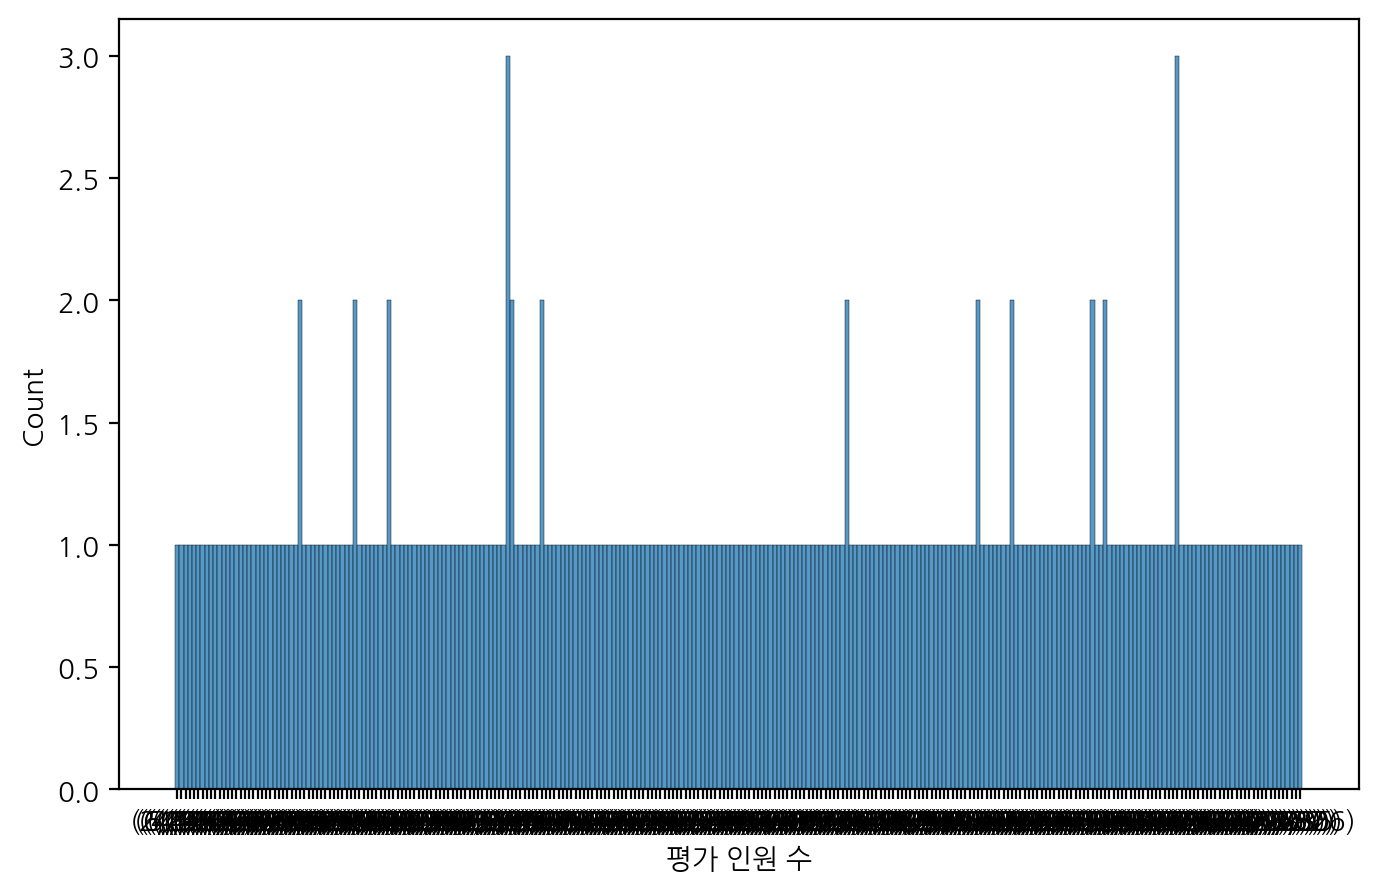

In [446]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(x=bb_df_all['평가 인원 수'])

plt.show()


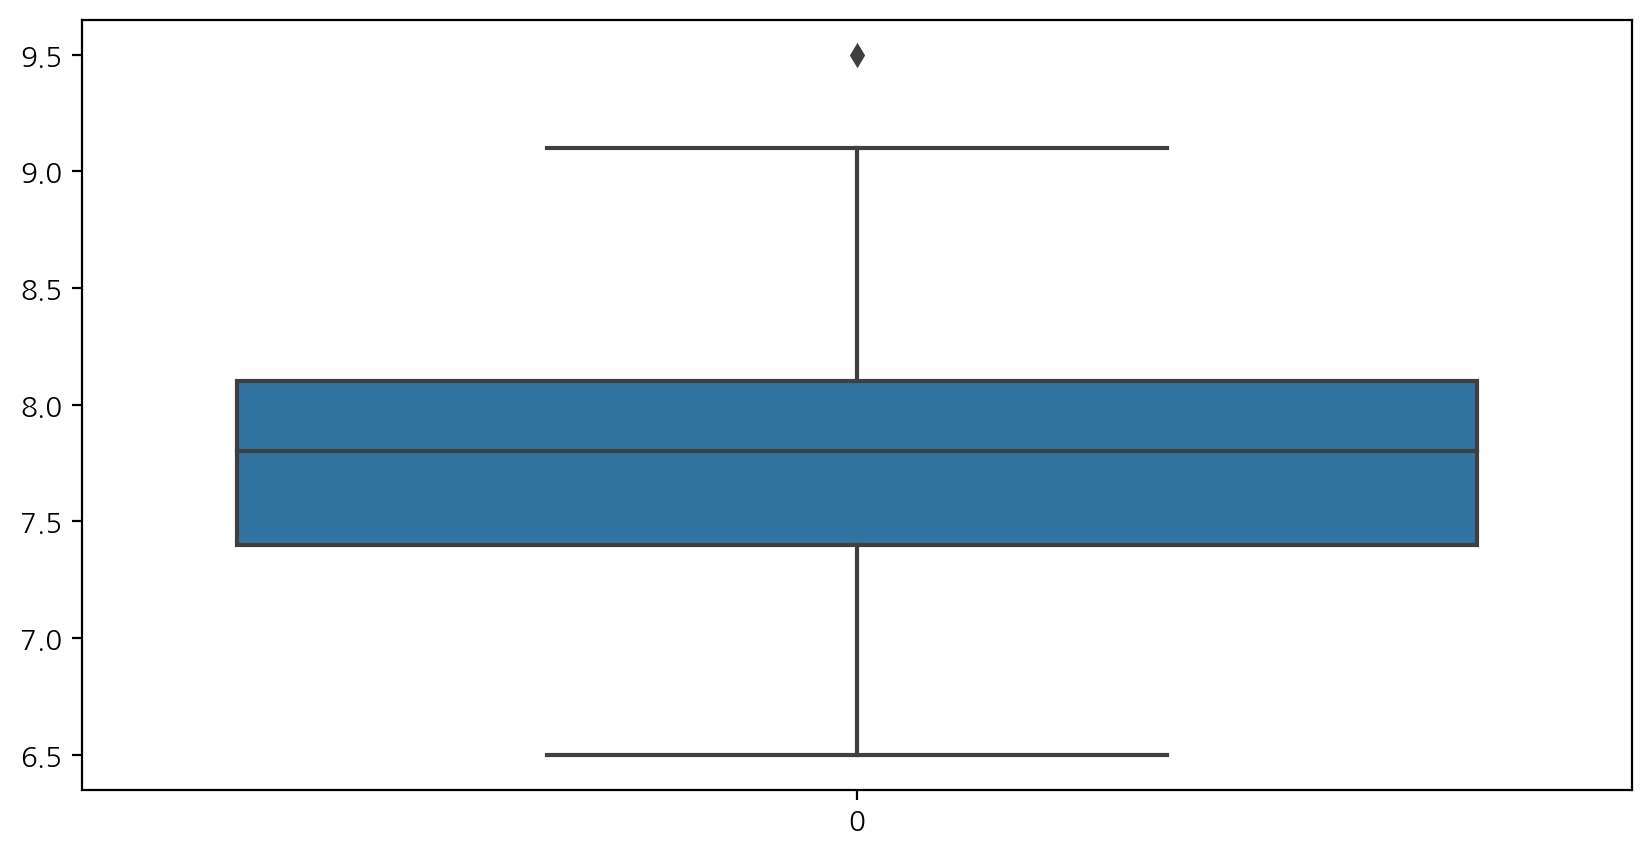

In [447]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(bb_df_all['평점'])
plt.show()

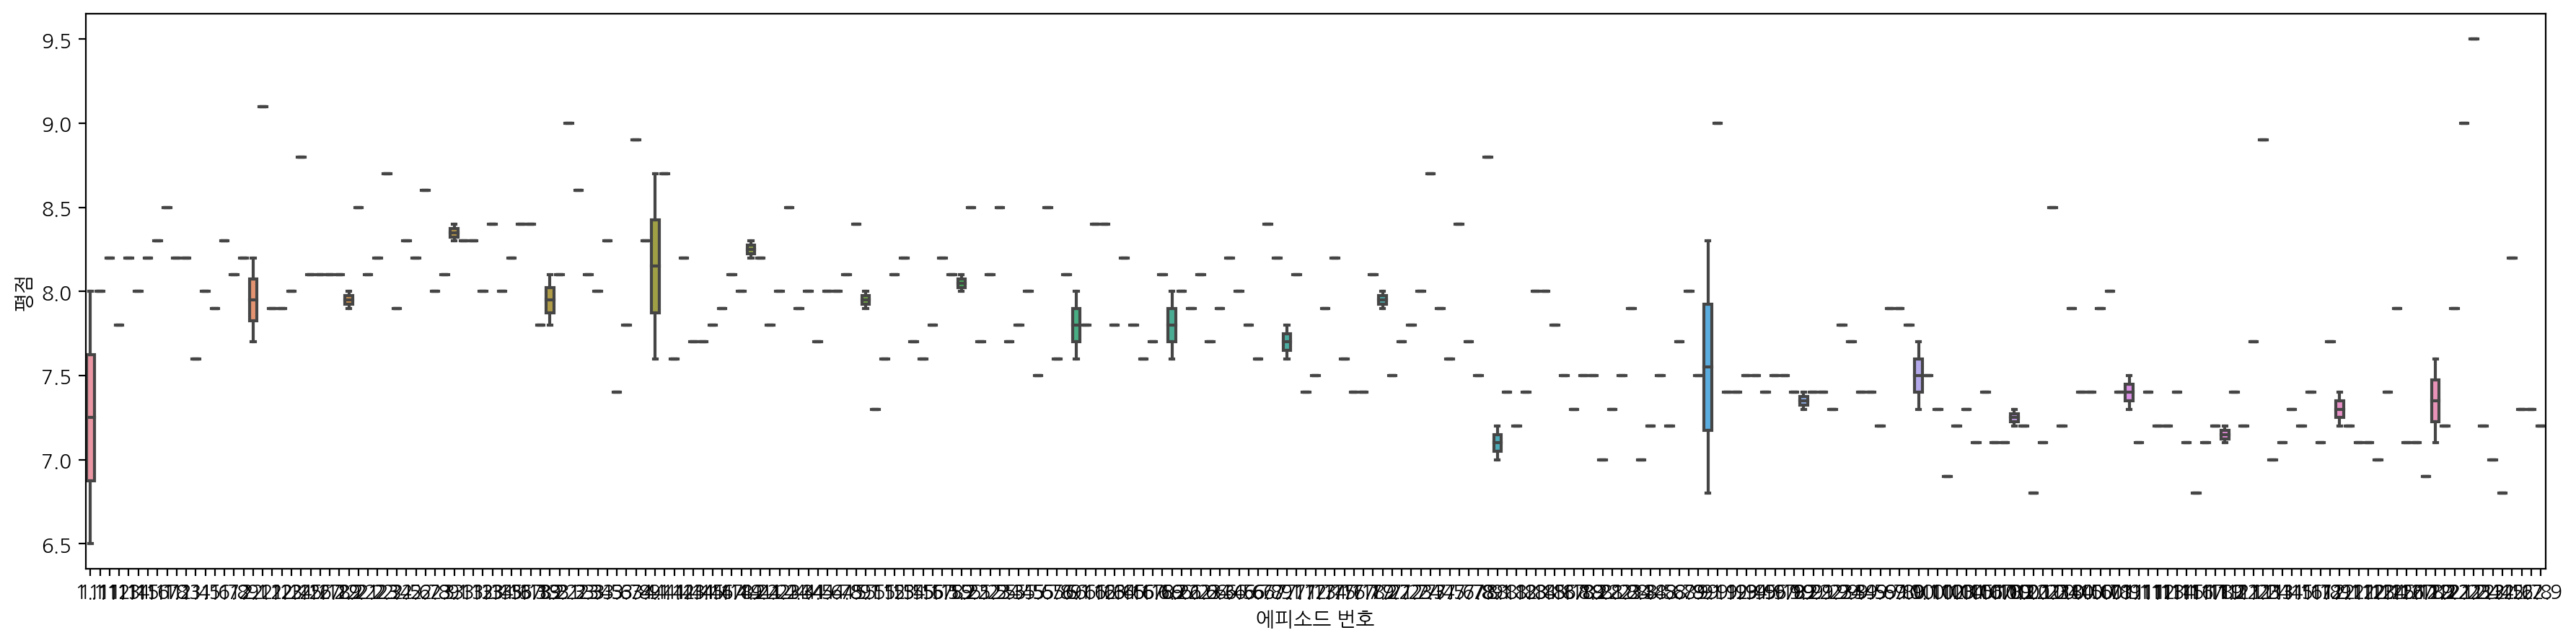

In [489]:
fig, ax = plt.subplots(figsize=(22, 5))
sns.boxplot(x=bb_df_all['에피소드 번호'], y=bb_df_all['평점'])

plt.show()

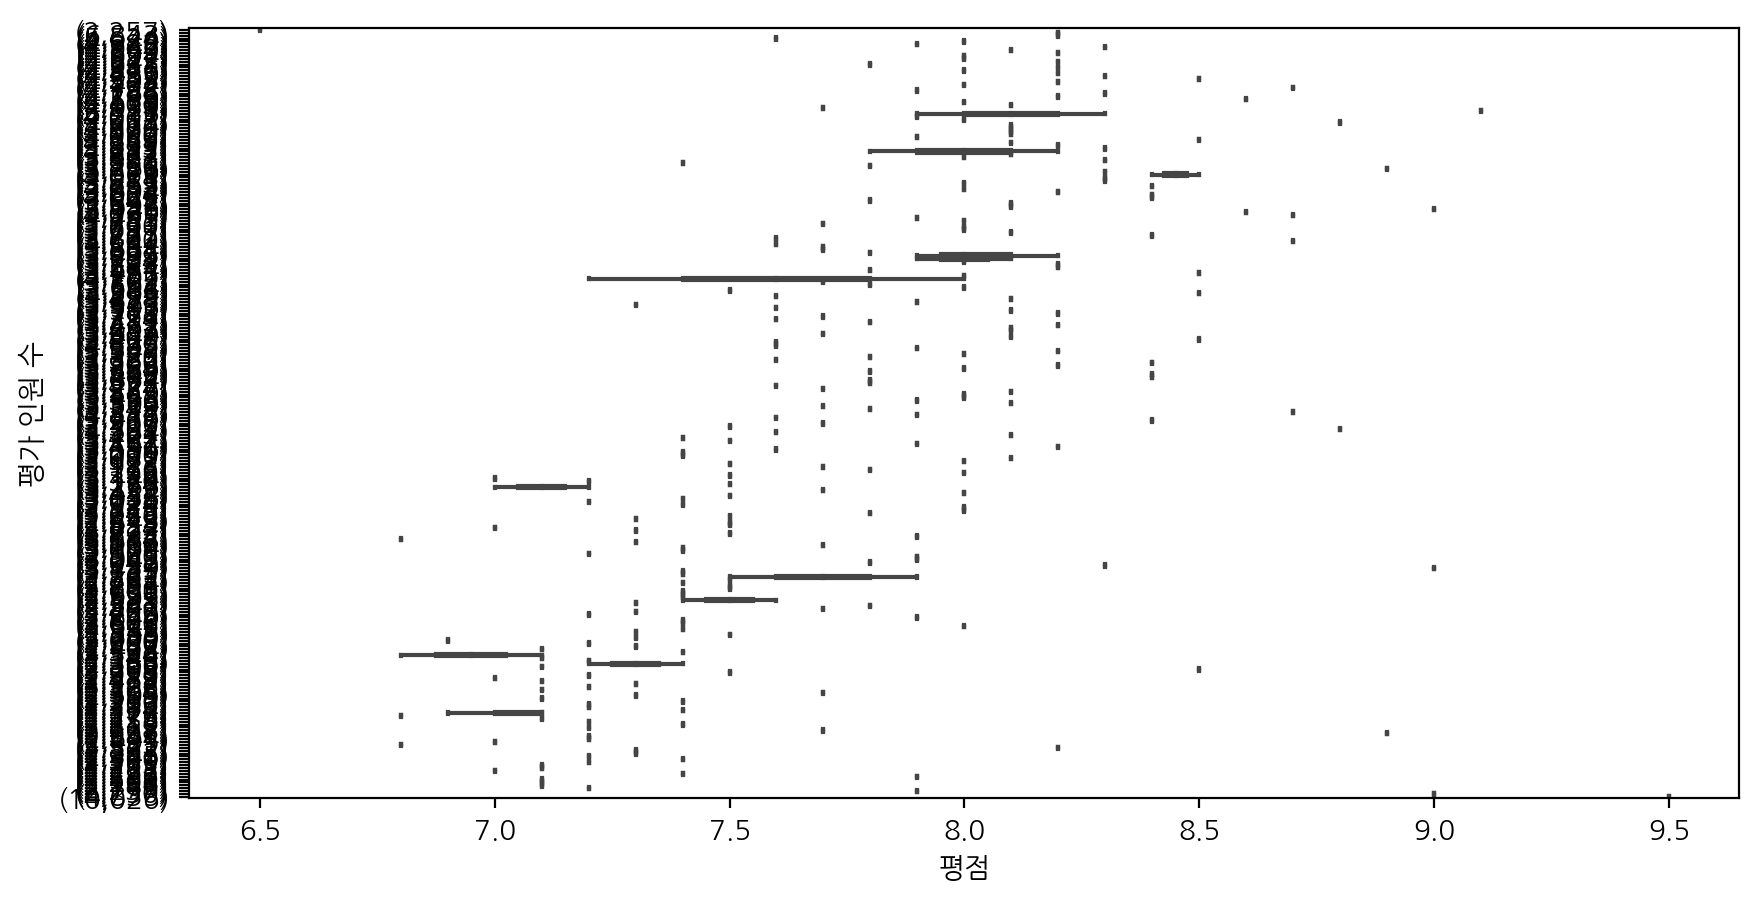

In [449]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x=bb_df_all['평점'], y=bb_df_all['평가 인원 수'])
plt.show()

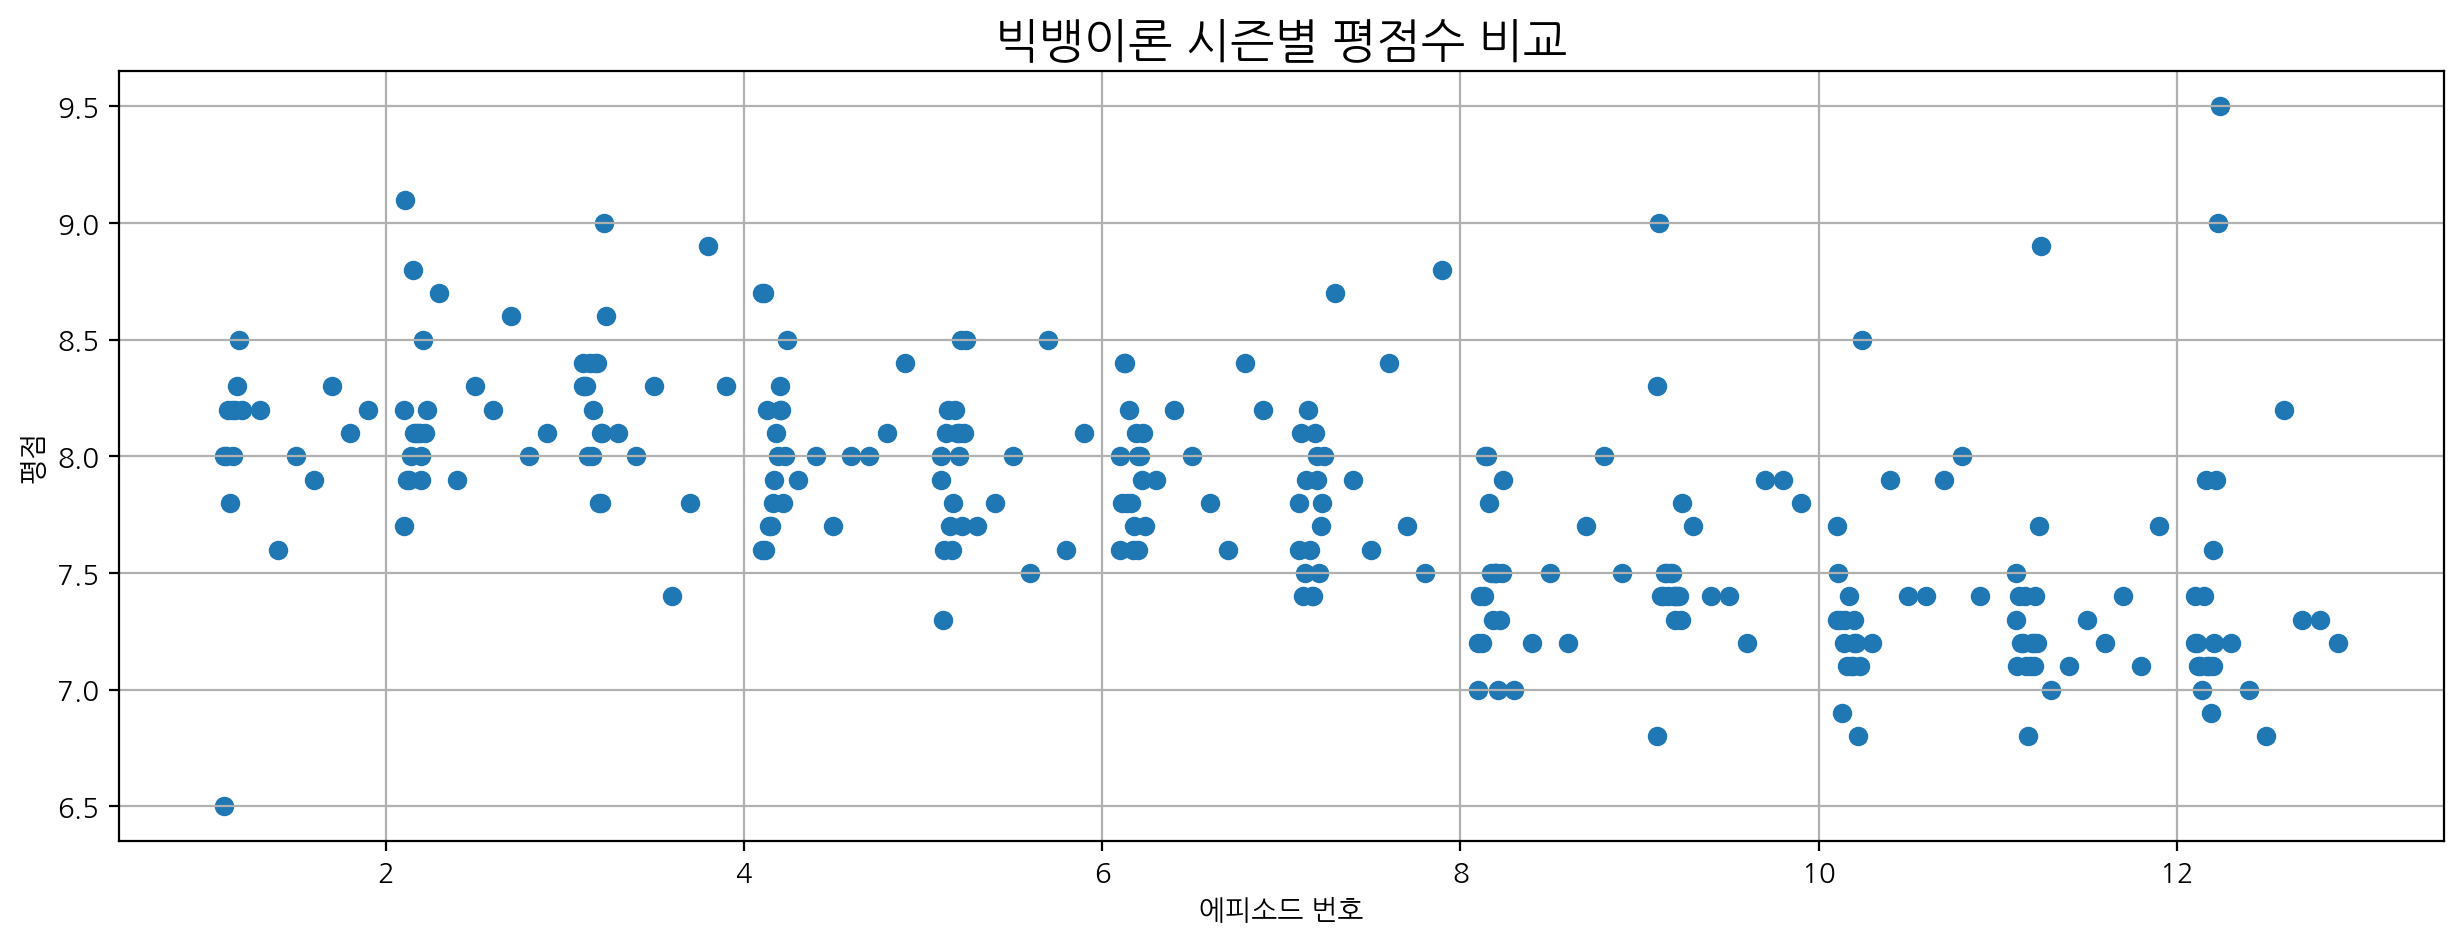

In [504]:
plt.figure(figsize =(15,5))
x = bb_df_all['에피소드 번호']
y = bb_df_all['평점']
plt.scatter(x,y)

plt.title('빅뱅이론 시즌별 평점수 비교', fontsize = 17)
plt.xlabel('에피소드 번호', fontsize =10)
plt.ylabel('평점', fontsize = 10)
plt.grid()                            # 평점이 꽤 높다는 것을 알 수 있다.

plt.show()

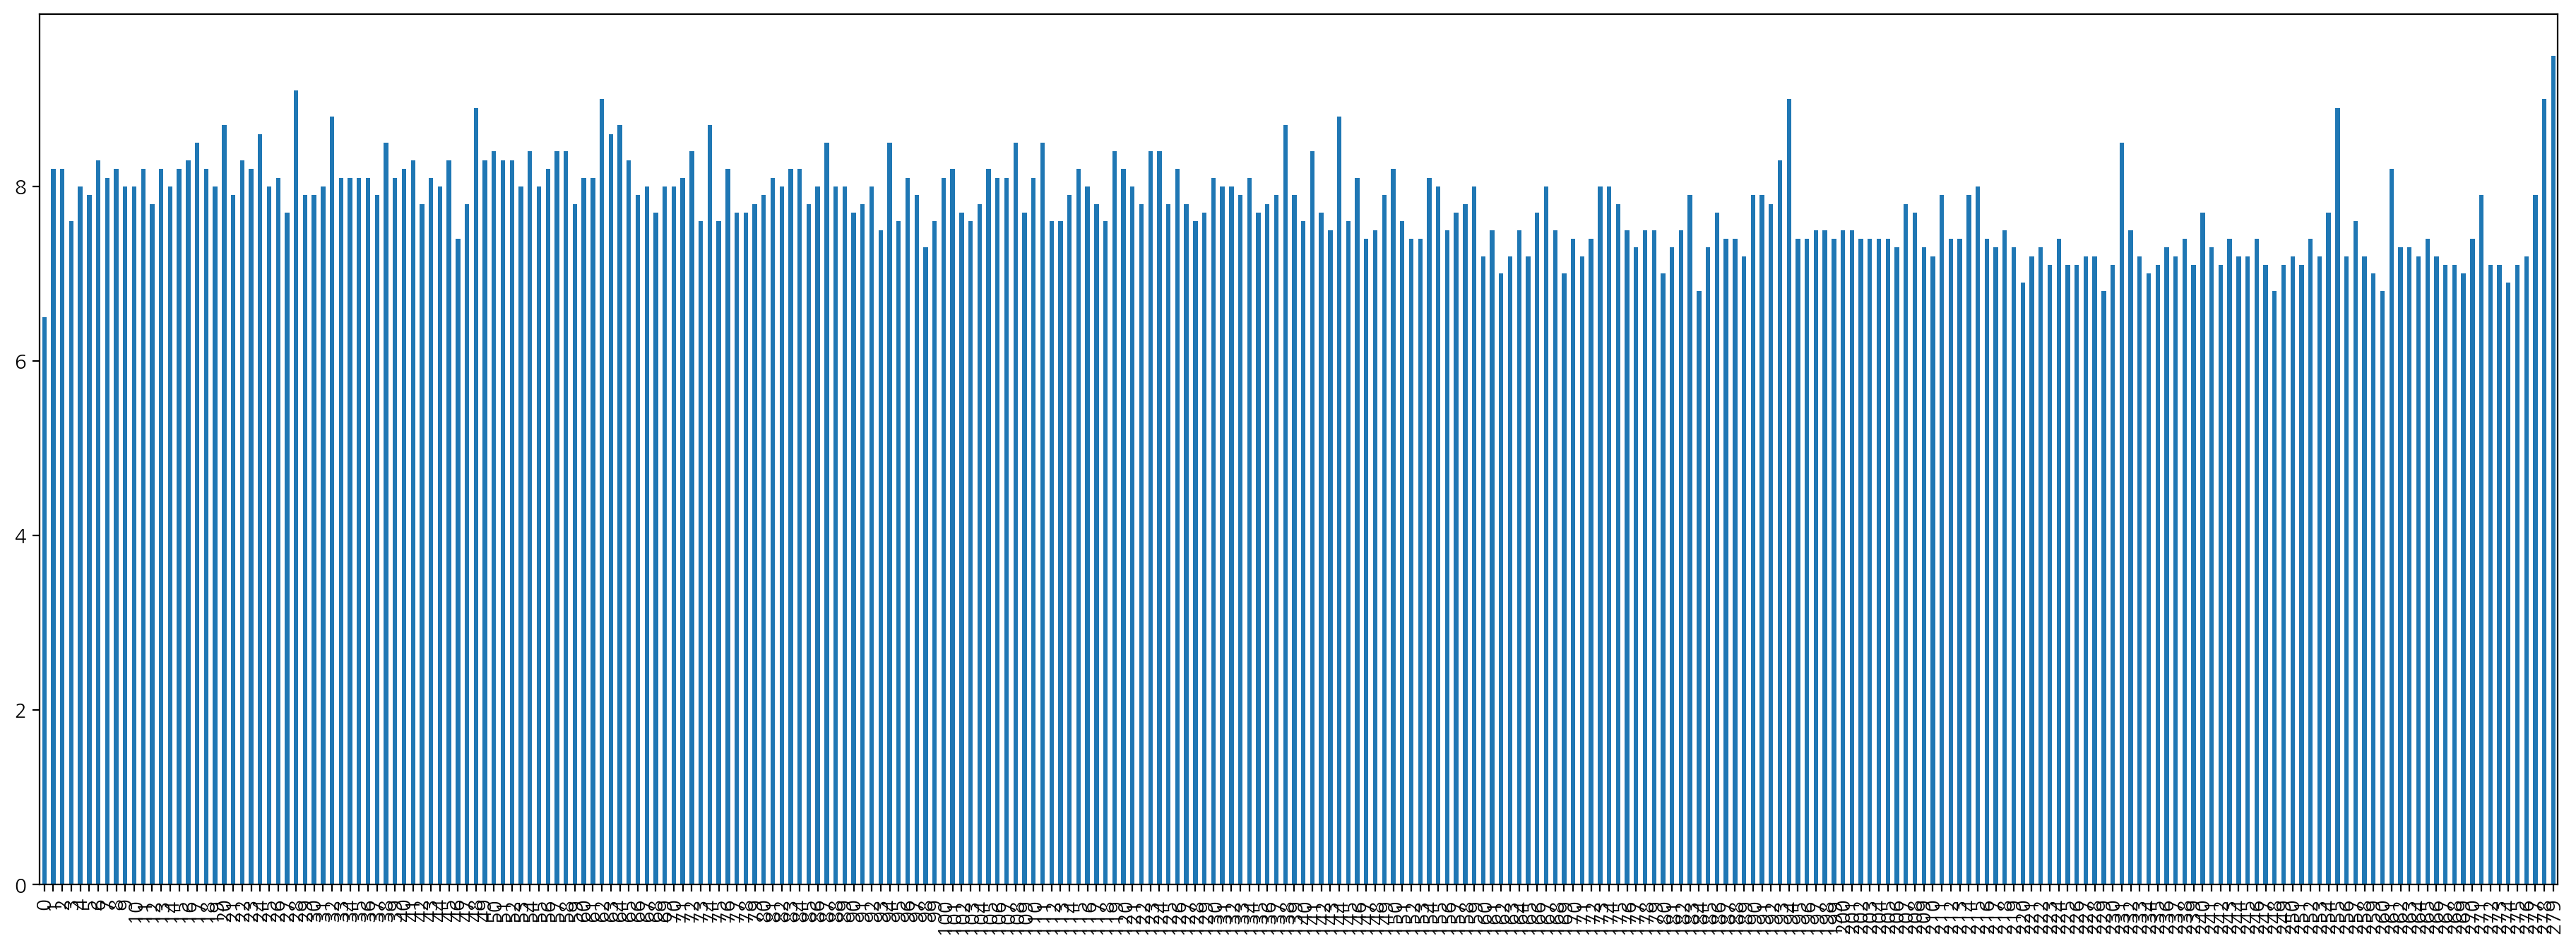

In [464]:
bb_df_all['평점'].plot(kind='bar', figsize=(23,8)); 